<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-packages" data-toc-modified-id="Import-packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import packages</a></span></li><li><span><a href="#Read-Enm-pickle-object" data-toc-modified-id="Read-Enm-pickle-object-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read Enm pickle object</a></span></li><li><span><a href="#Calculate-node-positions-with-spring-layout" data-toc-modified-id="Calculate-node-positions-with-spring-layout-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calculate node positions with spring layout</a></span></li><li><span><a href="#Network-plot" data-toc-modified-id="Network-plot-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Network plot</a></span><ul class="toc-item"><li><span><a href="#Figure-1B,-left" data-toc-modified-id="Figure-1B,-left-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Figure 1B, left</a></span></li><li><span><a href="#Figure-1B,-right" data-toc-modified-id="Figure-1B,-right-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Figure 1B, right</a></span></li></ul></li><li><span><a href="#Figure-1C" data-toc-modified-id="Figure-1C-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Figure 1C</a></span></li><li><span><a href="#Figure-1D" data-toc-modified-id="Figure-1D-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Figure 1D</a></span></li><li><span><a href="#Figure-3C" data-toc-modified-id="Figure-3C-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Figure 3C</a></span></li><li><span><a href="#Figure-4B" data-toc-modified-id="Figure-4B-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Figure 4B</a></span></li><li><span><a href="#Figure-5D/F" data-toc-modified-id="Figure-5D/F-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Figure 5D/F</a></span></li></ul></div>

# Import packages

In [1]:
%load_ext autoreload
%autoreload 2
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import numpy as np
import pandas as pd
import pickle
import os
import re
import itertools as itr
from enm.Enm import Enm
from enm.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#os.chdir('../')
figure_folder = "reports/figures/paper_figures_052521"

# Read Enm pickle object

In [3]:
with open(snakemake.input.pickle_file_name,'rb') as f:
    e_pcc = pickle.load(f)



# Calculate node positions with spring layout

**This could be different from the ones shown in paper due to random node position calculation**

This does not change any claims in the paper

In [4]:
#e_pcc.spring_pos(seed=12)

In [5]:
pos =e_pcc.graph_gc.nodes('pos')

# Network plot
## Figure 1B, left

In [7]:
fig, ax =plt.subplots(figsize=(4,4))

nx.draw_networkx_nodes(e_pcc.graph_gc,
                           node_size=0.2,
                           alpha=0.5,
                           node_color='k',
                           pos=pos,
                         ax=ax
                           # node_shape=matplotlib.markers.MarkerStyle(marker='o',fillstyle='full')
                           )
nx.draw_networkx_edges(e_pcc.graph_gc,
                           alpha= 0.1,
                           width= 0.1,
                           edge_color='k',
                           pos=pos,
                           label='PCC>0.2',ax=ax)
legend_elements = [Line2D([0], [0], marker='o', color='black', label='Genes',
                              markerfacecolor='black', markersize=12, linestyle="None"),
                       Line2D([0], [0], marker='o', color='black', label= 'High\nfunctional\nsimilarity\n(PCC≥0.2)',
                              markerfacecolor='black', markersize=0, linestyle="-", alpha=0.5,lw=5)
    ]

lgd = ax.legend(handles=legend_elements, fontsize=12,loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

ax.axis('off')
if snakemake.params['save']:
    plt.savefig(f'{figure_folder}/fig1b_left.png',bbox_inches='tight',dpi=150)

## Figure 1B, right

/home/oma21/enm_package/enm/visualize.py:180: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_heatmap.set_xticklabels(idx1_cl, minor=False)
/home/oma21/enm_package/enm/visualize.py:188: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_heatmap.set_yticklabels(idx2_cl, minor=False)


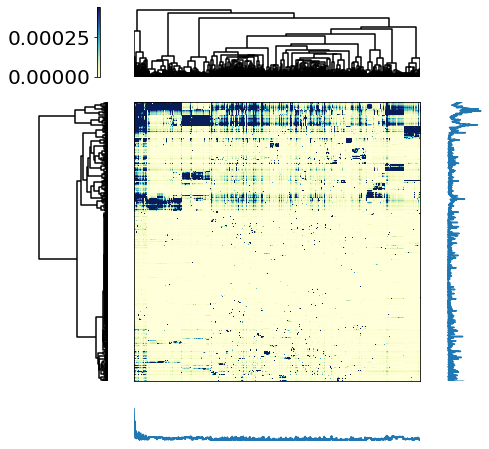

(array([0.00225456, 0.00212964, 0.00064455, ..., 0.0018722 , 0.00188671,
        0.00196717]),
 array([0.00670243, 0.00670243, 0.00610539, ..., 0.00030683, 0.00022774,
        0.00013241]))

In [6]:
e_pcc.figure_path=figure_folder
e_pcc.heatmap_annotated( save_figure=False , figure_name = 'fig1b_right')

# Figure 1C

`get_clustered_nodes` finds the gene names belonging the outmost, smaller cluster for rows and columns as shown.

In [7]:
cc = e_pcc.df.iloc[e_pcc.get_clustered_nodes('column'),:]
rc = e_pcc.df.iloc[e_pcc.get_clustered_nodes('row'),:]

rc: row cluster

cc: column cluster

In [8]:
df = e_pcc.df
df['eff_norm']=df['eff']/5183
df['sens_norm']=df['sens']/5183
df['cc'] = ['cc' if i in cc.orf_name.tolist() else 'other' for i in df.orf_name.tolist()]
df['rc'] = ['rc' if i in rc.orf_name.tolist() else 'other' for i in df.orf_name.tolist()]

In [9]:
def run_permutation_test(pooled,sizeZ,sizeY,delta):
    np.random.shuffle(pooled)
    starZ = pooled[:sizeZ]
    starY = pooled[-sizeY:]
    return starZ.mean() - starY.mean()

z = np.array(df.loc[df.rc=='rc','eff_norm'])
y = np.array(df.loc[df.rc!='rc','eff_norm'])
pooled = np.hstack([z,y])
delta = z.mean() - y.mean()
numSamples = 10000
estimates = np.fromiter(map(lambda x: run_permutation_test(pooled,z.size,y.size,delta),range(numSamples)),dtype=float)
diffCount = len(np.where(estimates >= delta)[0])
pval_rc = ((float(diffCount)+1)/(float(numSamples)+1))
pval_rc

9.999000099990002e-05

In [10]:
z = np.array(df.loc[df.cc=='cc','sens_norm'])
y = np.array(df.loc[df.cc!='cc','sens_norm'])
pooled = np.hstack([z,y])
delta = z.mean() - y.mean()
numSamples = 10000
estimates = np.fromiter(map(lambda x: run_permutation_test(pooled,z.size,y.size,delta),range(numSamples)),dtype=float)
diffCount = len(np.where(estimates >= delta)[0])
pval_cc = ((float(diffCount)+1)/(float(numSamples)+1))
pval_cc

9.999000099990002e-05

In [11]:
delta

0.0006677528093055543

In [12]:
estimates

array([ 3.10873180e-05,  5.66789586e-05,  4.30932795e-05, ...,
        7.34449347e-05,  3.25165935e-07, -1.25138493e-05])

In [52]:
import seaborn as sns
color = {'cc': 'orange','other':'k','rc':'orangered'}
fig, ax = plt.subplots(2,1,figsize=(3.5,2.8))

sns.boxplot(data=df, x='eff_norm',y='rc',order=['rc','other'],palette=color,ax=ax[0],
           fliersize=1,linewidth=0.5)
ax[0].set_yticklabels(['Distinct\nPerturbed Gene\nCluster', 'Other genes'],fontsize=6)
ax[0].set_ylabel('Perturbed genes\ndendrogram',fontsize=10)
ax[0].set_xlabel('Effectiveness (a.u.)',fontsize=10)
ax[0].plot([0.006, 0.0065, 0.0065, 0.006] , [0,0, 1,1] , lw=1.5, c='k')
ax[0].text(0.007, .6,  "***", ha='center', va='bottom', color='k',fontsize=8, rotation =90)
ax[0].set_xlim(-0.0001,0.007)
ax[0].tick_params(axis='x', labelsize= 8)
ax[0].tick_params(axis='y', labelsize= 8)

sns.boxplot(data=df, x='sens_norm',y='cc',order=['cc','other'],palette=color,ax=ax[1],
           fliersize=1,linewidth=0.5)
ax[1].set_yticklabels(['Distinct\nResponding Gene\nCluster', 'Other genes'],fontsize=6)
ax[1].set_ylabel('Responding genes\ndendrogram',fontsize=10)
ax[1].set_xlabel('Sensitivity (a.u.)',fontsize=10)
ax[1].plot([0.007, 0.0075, 0.0075, 0.007],[0,0, 1,1],  lw=1.5, c='k')
ax[1].text(0.008, .6,  "***", ha='center', va='bottom', color='k',fontsize=8, rotation=90)
ax[1].set_xlim(-0.0001,0.0081)
ax[1].tick_params(axis='x', labelsize= 8)
ax[1].tick_params(axis='y', labelsize= 8)


fig.align_ylabels()
plt.tight_layout()

if snakemake.params['save']:
    plt.savefig(f'{figure_folder}/fig1c.pdf',bbox_inches='tight')

In [45]:
import matplotlib
print(matplotlib.matplotlib_fname())

# Figure 1D

In [62]:
fig, ax = plt.subplots(figsize=(12,12))
#axs = ax.ravel()
legend_elements = [    ]

#for i in range(len(sensor_order)):
nx.draw_networkx_nodes(e_pcc.graph_gc, ax =ax , pos=pos,node_size=1, node_color='black')
nx.draw_networkx_edges(e_pcc.graph_gc, ax =ax , pos=pos,node_size=1, edge_color='black',alpha=0.2, width=0.1)
nx.draw_networkx_nodes(e_pcc.graph_gc, 
                       nodelist=rc.orf_name.tolist(),
                       ax=ax, 
                       pos=pos,
                       node_color='orangered',
                      edgecolors='black',
                      node_size=100,
                      node_shape='d')

ax.set_facecolor('white')
legend_elements.extend(
    [Line2D([0], [0], marker='d', color='black', label='Distinct perturbed\ngene cluster',
                              markerfacecolor='orangered', markersize=50, linestyle="None"),
     Line2D([0], [0], marker='o', color='black', label='Other Genes',
                              markerfacecolor='black', markersize=25, linestyle="None"),
#                    Line2D([0], [0], marker='o', color='black', label='Effectors',
#                               markerfacecolor='black', markersize=10, linestyle="None"),
#                    Line2D([0], [0], marker='^', color='black', label='Sensors',
#                               markerfacecolor='black', markersize=10, linestyle="None"),
                       Line2D([0], [0], marker='o', color='black', label= 'High\nfunctional\nsimilarity',
                              markerfacecolor='black', markersize=0, linestyle="-", alpha=0.5,lw=10)
    ]
)
lgd = ax.legend(handles=legend_elements, fontsize=30,loc='center left', bbox_to_anchor=(1.1, 0.5), frameon=False)

ax.axis('off')
#nx.draw_networkx_edges(nx.induced_subgraph(e_pcc.graph_gc, effector_pcc.orf_name.tolist()), ax=ax , pos=pos, edge_color='blue',alpha=0.5)
if snakemake.params['save']:
    plt.savefig(f'{figure_folder}/fig1d_up.png',bbox_inches='tight',dpi=150)

In [70]:
fig, ax = plt.subplots(figsize=(8,8))
#axs = ax.ravel()
legend_elements = [    ]

#for i in range(len(sensor_order)):
nx.draw_networkx_nodes(e_pcc.graph_gc, ax =ax , pos=pos,node_size=1, node_color='black')
nx.draw_networkx_edges(e_pcc.graph_gc, ax =ax , pos=pos,node_size=1, edge_color='black',alpha=0.2, width=0.1)
nx.draw_networkx_nodes(e_pcc.graph_gc, 
                       nodelist=cc.orf_name.tolist(),
                       ax=ax, 
                       pos=pos,
                       node_color='orange',
                      edgecolors='black',
                      node_size=100,
                      node_shape='D')

ax.set_facecolor('white')
legend_elements.extend([
    Line2D([0], [0], marker='D', color='black', label='Distinct responding\ngene cluster',
                              markerfacecolor='orange', markersize=50, linestyle="None"),
    Line2D([0], [0], marker='o', color='black', label='Other Genes',
                              markerfacecolor='black', markersize=25, linestyle="None"),
                       Line2D([0], [0], marker='o', color='black', label= 'High\nfunctional\nsimilarity',
                              markerfacecolor='black', markersize=0, linestyle="-", alpha=0.5,lw=10),
    ]
)
lgd = ax.legend(handles=legend_elements, fontsize=30,loc='center left', bbox_to_anchor=(1.1, 0.5), frameon=False)
ax.axis('off')

#nx.draw_networkx_edges(nx.induced_subgraph(e_pcc.graph_gc, effector_pcc.orf_name.tolist()), ax=ax , pos=pos, edge_color='blue',alpha=0.5)
if snakemake.params['save']:
    plt.savefig(f'{figure_folder}/fig1d_bottom.png',bbox_inches='tight',dpi=150)

# Figure 3C

In [13]:
import seaborn as sns
sensor_colors = [mpl.colors.to_hex(i) for i in sns.color_palette('Set3')]

In [15]:
change_go_group_names = True#snakemake.params['change_go_group_name']
# sensor_go_rename = {
#   "cellular response to iron ion starvation":'Iron ion transport' ,
# "mitochondria-nucleus signaling pathway":  "Mitochondria-nucleus\nsignaling pathway\nand\nTricarboxylic acid cycle",
# "phenylalanine transport":  "Phenylalanine transport",
# "hexose metabolic process":  "Hexose metabolic process",
# "tricarboxylic acid cycle":  "Tricarboxylic acid cycle"
# }

In [17]:
sensors_pcc = pd.read_csv(snakemake.input.sensors_pcc)
# sensor_colors = ["#377EB8", "#4DAF4A", "#984EA3", "#FF7F00", "#FFFF33"]
# if change_go_group_names:
#    sensors_pcc['go_group']=sensors_pcc['go_group'].map(sensor_go_rename,na_action='ignore')
sensor_order = sensors_pcc.groupby('label').sens.median().sort_values().index.tolist()

(-4.320120990276337, 4.355751931667329, -4.392840337753296, 4.249647092819215)

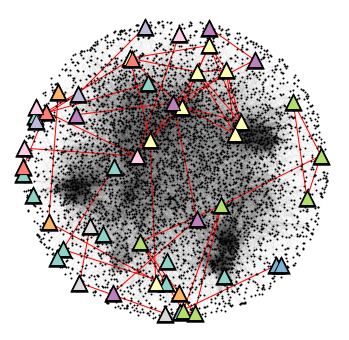

In [18]:
fig, ax = plt.subplots(figsize=(6,6))
#axs = ax.ravel()
legend_elements = [    ]

#for i in range(len(sensor_order)):
e_pcc.plot_network_spring(ax=ax,
                          node_size=1,
                          node_color='black',
 #                        node_size = [100 if i in sensors_pcc.orf_name.values or i in effector_pcc.orf_name.values else 1 for i in e_pcc.nodes],
                         #node_color = ['red' if i in sensors_pcc.orf_name.values else 'blue' if i in effector_pcc.orf_name.values else 'black' for i in e_pcc.nodes],
                         edge_color='black',savefig=False)
    #                         node_shape=['^' if i in sensors_pcc.orf_name.values else 'v' if i in effector_pcc.orf_name.values else 'o' for i in e_pcc.nodes])
    # nx.draw_networkx_nodes(e_pcc.graph_gc, nodelist=sensors_pcc.orf_name.values, node_size=200, pos=pos,
    #                           node_color='black',
    #                           node_shape='^',edgecolors='black',
    #                           linewidths=1)
nx.draw_networkx_nodes(nx.induced_subgraph(e_pcc.graph_gc, sensors_pcc.orf_name.tolist()),
                       pos=pos, 
                       node_color='black', alpha=1, node_shape='^')

for itr, i in enumerate(sensor_order):
   # print(i, sensor_order[itr])

    orf_names_to_plot = sensors_pcc.loc[sensors_pcc.label==i, 'orf_name'].tolist()
    nx.draw_networkx_nodes(e_pcc.graph_gc, nodelist=orf_names_to_plot, node_size=200, pos=pos,
                          node_color=sensor_colors[itr],
                          node_shape='^',edgecolors='black',
                          linewidths=1)
    legend_elements.append(
        Line2D([0], [0], marker='^', color='black', label=f'{i}',
                              markerfacecolor=sensor_colors[itr], markersize=8, linestyle="None")
    )
ax.set_facecolor('white')
#legend_elements.append(
#        Line2D([0], [0], marker='^', color='black', label=f'No GO Enrichment',
#                              markerfacecolor='black', markersize=8, linestyle="None")
#    )
legend_elements.extend(
    [Line2D([0], [0], marker='o', color='black', label='Other Genes',
                              markerfacecolor='black', markersize=4, linestyle="None"),
#                    Line2D([0], [0], marker='o', color='black', label='Effectors',
#                               markerfacecolor='black', markersize=10, linestyle="None"),
#                    Line2D([0], [0], marker='^', color='black', label='Sensors',
#                               markerfacecolor='black', markersize=10, linestyle="None"),
                       Line2D([0], [0], marker='o', color='black', label= 'High functional similarity',
                              markerfacecolor='black', markersize=0, linestyle="-", alpha=0.5, lw=4),
                   Line2D([0], [0], marker='o', color='red', label= 'Sensor-Sensor edges',
                              markerfacecolor='#018571', markersize=0, linestyle="-",lw=4)
                   #Line2D([0], [0], marker='o', color='blue', label= 'Effector-Effector edges',
    #                          markerfacecolor='#a6611a', markersize=0, linestyle="-")
    ]
)
#lgd = ax.legend(handles=legend_elements, fontsize=22,loc='center left', bbox_to_anchor=(1.1, 0.5),ncol=5)
nx.draw_networkx_edges(nx.induced_subgraph(e_pcc.graph_gc, sensors_pcc.orf_name.tolist()),pos=pos, edge_color='red', alpha=1)
ax.axis('off')
# if snakemake.params['save']:
#     plt.savefig(f'{figure_folder}/fig3c.png',bbox_inches='tight',dpi=150)

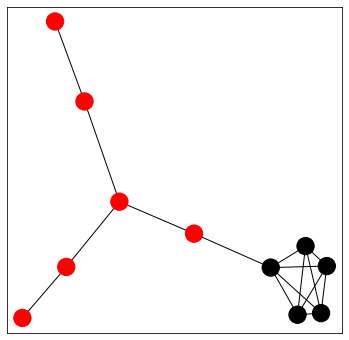

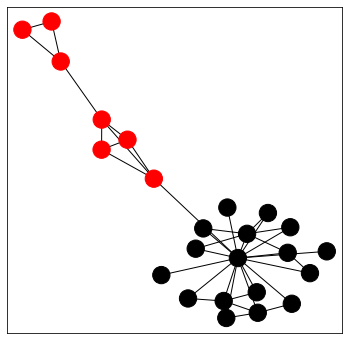

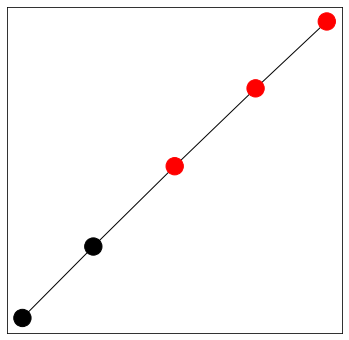

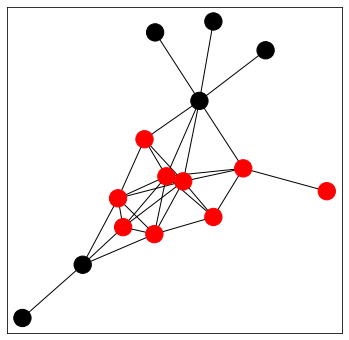

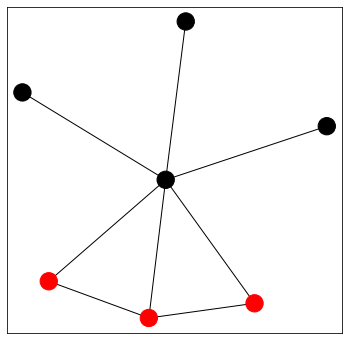

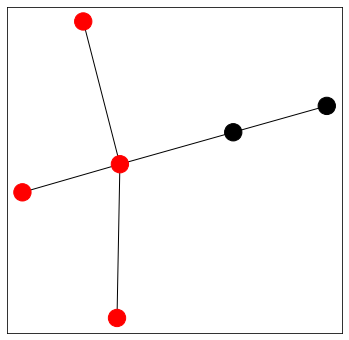

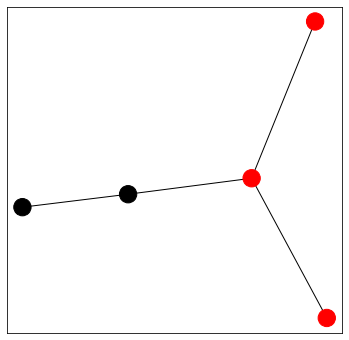

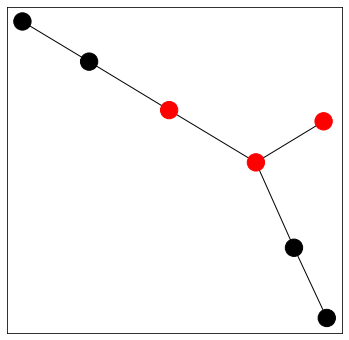

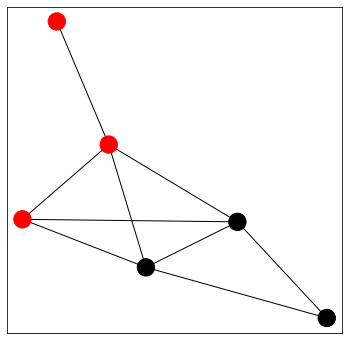

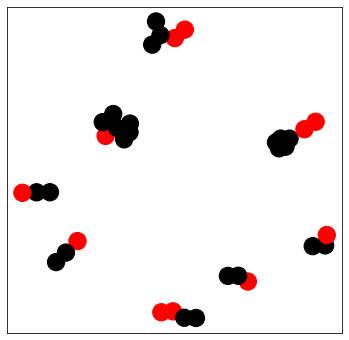

In [19]:
for i in sorted(sensors_pcc.dropna(subset=['sensor_cluster']).sensor_cluster.unique()):
    sub_orfs = sensors_pcc.loc[sensors_pcc.sensor_cluster==i,'orf_name'].tolist()
    sub_nw = get_subnetwork(e_pcc.graph_gc, sub_orfs, radius= 2)
    pos_sub = nx.spring_layout(sub_nw)
    fig,ax = plt.subplots(figsize=(6,6))
    nx.draw_networkx_nodes(sub_nw,ax=ax, pos = pos_sub, node_color = ['red' if i in sub_orfs else 'k' for i in sub_nw.nodes ])
    nx.draw_networkx_edges(sub_nw,ax=ax, pos = pos_sub)

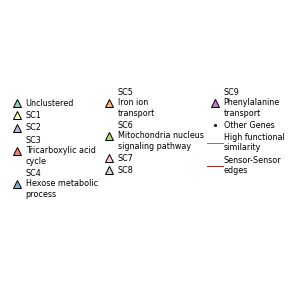

<Figure size 216x72 with 0 Axes>

In [20]:
smsize = 2
lgsize = 8
linesize = 1 
legend_elements = []
for itr, i in enumerate(sensor_order):
   # print(i, sensor_order[itr])

    #orf_names_to_plot = sensors_pcc.loc[sensors_pcc.label==i, 'orf_name'].tolist()
#     nx.draw_networkx_nodes(e_pcc.graph_gc, nodelist=orf_names_to_plot, node_size=200, pos=pos,
#                           node_color=sensor_colors[itr],
#                           node_shape='^',edgecolors='black',
#                           linewidths=1)
    legend_elements.append(
        Line2D([0], [0], marker='^', color='black', label=f'{i}',
                              markerfacecolor=sensor_colors[itr], markersize=lgsize, linestyle="None")
    )
#ax.set_facecolor('white')
legend_elements.extend(
    [Line2D([0], [0], marker='o', color='black', label='Other Genes',
                              markerfacecolor='black', markersize=smsize, linestyle="None"),
#                    Line2D([0], [0], marker='o', color='black', label='Effectors',
#                               markerfacecolor='black', markersize=10, linestyle="None"),
#                    Line2D([0], [0], marker='^', color='black', label='Sensors',
#                               markerfacecolor='black', markersize=10, linestyle="None"),
                       Line2D([0], [0], marker='o', color='black', label= 'High functional\nsimilarity',
                              markerfacecolor='black', markersize=0, linestyle="-", alpha=0.5, lw=linesize),
                   Line2D([0], [0], marker='o', color='red', label= 'Sensor-Sensor\nedges',
                              markerfacecolor='#018571', markersize=0, linestyle="-",lw=linesize)
                   #Line2D([0], [0], marker='o', color='blue', label= 'Effector-Effector edges',
    #                          markerfacecolor='#a6611a', markersize=0, linestyle="-")
    ]
)
fig = plt.figure()
figlegend = plt.figure(figsize=(3,1))
ax = fig.add_subplot(111)
#lines = ax.plot(range(10), plt.randn(10), range(10), plt.randn(10))
ax.axis('off')
lgd = ax.legend(handles=legend_elements,
                handletextpad=0.1, 
                labelspacing=0.4, 
                borderpad=0,
                columnspacing=0.4,
                fontsize=8, 
                ncol=3,
                frameon=False, 
                loc = 'center',
                bbox_to_anchor=(0., 0., 1, 1))
# if snakemake.params['save']:
#     fig.savefig(f'{figure_folder}/fig3c_legend.png', dpi=150, pad_inches=0)#, bbox_inches='tight')

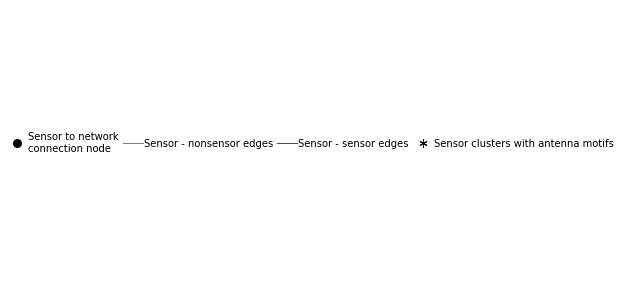

<Figure size 1008x144 with 0 Axes>

In [39]:
antenna_legend = []
antenna_legend.extend(
    [Line2D([0], [0], marker='o', color='black', label='Sensor to network\nconnection node',
                              markerfacecolor='black', markersize=lgsize, linestyle="None"),
#                    Line2D([0], [0], marker='o', color='black', label='Effectors',
#                               markerfacecolor='black', markersize=10, linestyle="None"),
#                    Line2D([0], [0], marker='^', color='black', label='Sensors',
#                               markerfacecolor='black', markersize=10, linestyle="None"),
                       Line2D([0], [0], marker='o', color='black', label= 'Sensor - nonsensor edges',
                              markerfacecolor='black', markersize=0, linestyle="-", alpha=0.5, lw=linesize),
    Line2D([0], [0], marker='o', color='red', label= 'Sensor - sensor edges',
                              markerfacecolor='#018571', markersize=0, linestyle="-",lw=linesize),
       Line2D([0], [0], marker=(6, 2), color='black', label='Sensor clusters with antenna motifs',
                              markerfacecolor='black', markersize=lgsize, linestyle="None")]
)
fig = plt.figure()
figlegend = plt.figure(figsize=(14,2))
ax = fig.add_subplot(111)
ax.axis('off')
lgd = ax.legend(handles=antenna_legend,
                handletextpad=0.1, 
                labelspacing=0.4, 
                borderpad=0,
                columnspacing=0.4,
                fontsize=10, 
                ncol=4,
                frameon=False, 
                loc = 'center',
                bbox_to_anchor=(0., 0., 1, 1))
# if snakemake.params['save']:
fig.savefig(f'{figure_folder}/fig3f_legend.png',dpi=150,bbox_inches='tight')

# Figure 4B

In [43]:
effector_pcc = pd.read_csv(snakemake.input.effector_pcc)
#effector_colors = ["#A65628", "#F781BF", "#999999"]
effector_order_orig = effector_pcc.groupby('go_group').eff.median().sort_values().index.tolist()
effector_colors = ["#A65628", "#F781BF", "#999999",'blue','yellow','red']

In [44]:
if True:
    effector_go_group_map = {
        effector_order_orig[0]:"EC1 (Chromosome segregation)",
        effector_order_orig[1]:"EC2 (Golgi vesicle transport)",
        effector_order_orig[2]:"EC3 (Respiratory complex assembly)"
    }
    effector_pcc['go_group'] = effector_pcc['go_group'].map(effector_go_group_map)
effector_order = effector_pcc.groupby('go_group').eff.median().sort_values().index.tolist()

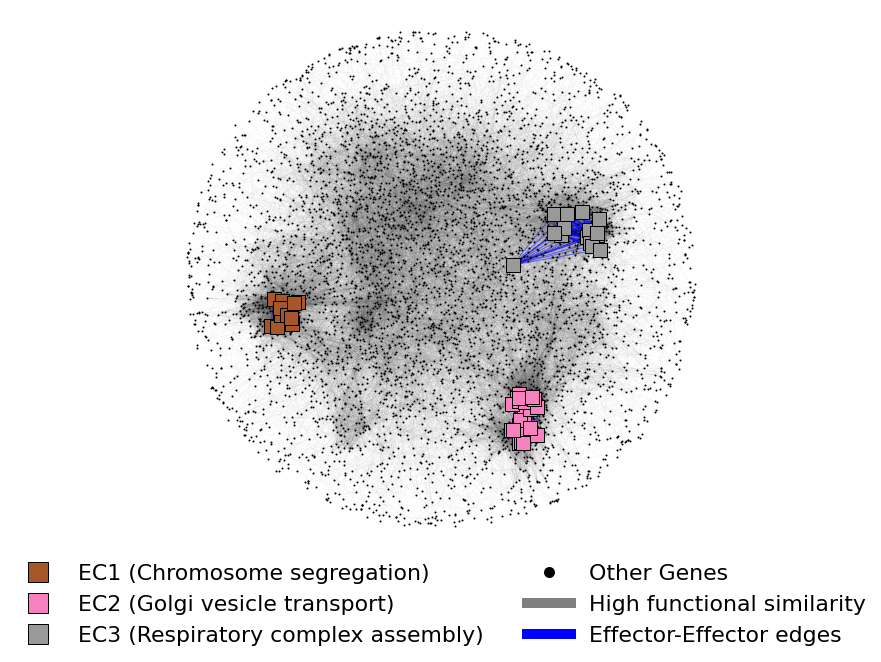

In [57]:
fig, ax = plt.subplots(figsize=(10,10))
#axs = ax.ravel()
legend_elements = [    ]

#for i in range(len(sensor_order)):
e_pcc.plot_network_spring(ax=ax,
                          node_size=1,
                          node_color='black',
 #                        node_size = [100 if i in sensors_pcc.orf_name.values or i in effector_pcc.orf_name.values else 1 for i in e_pcc.nodes],
                         #node_color = ['red' if i in sensors_pcc.orf_name.values else 'blue' if i in effector_pcc.orf_name.values else 'black' for i in e_pcc.nodes],
                         edge_color='black',savefig=False)
    #                         node_shape=['^' if i in sensors_pcc.orf_name.values else 'v' if i in effector_pcc.orf_name.values else 'o' for i in e_pcc.nodes])
    # nx.draw_networkx_nodes(e_pcc.graph_gc, nodelist=sensors_pcc.orf_name.values, node_size=200, pos=pos,
    #                           node_color='black',
    #                           node_shape='^',edgecolors='black',
    #                           linewidths=1)

for itr, i in enumerate(effector_order):
   # print(i, effector_colors[itr])
    #print(itr)
    
    orf_names_to_plot = effector_pcc.loc[effector_pcc.go_group==i, 'orf_name'].tolist()
    nx.draw_networkx_nodes(e_pcc.graph_gc, nodelist=orf_names_to_plot, node_size=200, pos=pos,
                          node_color=effector_colors[itr],
                          node_shape='s',edgecolors='black',
                          linewidths=1)
    legend_elements.append(
        Line2D([0], [0], marker='s', color='black', label=f'{i}',
                              markerfacecolor=effector_colors[itr], markersize=20, linestyle="None")
    )
ax.set_facecolor('white')
legend_elements.extend(
    [Line2D([0], [0], marker='o', color='black', label='Other Genes',
                              markerfacecolor='black', markersize=10, linestyle="None"),
#                    Line2D([0], [0], marker='o', color='black', label='Effectors',
#                               markerfacecolor='black', markersize=10, linestyle="None"),
#                    Line2D([0], [0], marker='^', color='black', label='Sensors',
#                               markerfacecolor='black', markersize=10, linestyle="None"),
                       Line2D([0], [0], marker='o', color='black', label= 'High functional similarity',
                              markerfacecolor='black', markersize=0, linestyle="-", alpha=0.5,lw=10),
                   Line2D([0], [0], marker='o', color='blue', label= 'Effector-Effector edges',
                             markerfacecolor='#a6611a', markersize=0, linestyle="-",lw=10)
    ]
)
lgd = ax.legend(handles=legend_elements, fontsize=22,loc='center', bbox_to_anchor=(0.5, -0.1), frameon=False, ncol=2)


nx.draw_networkx_edges(nx.induced_subgraph(e_pcc.graph_gc, effector_pcc.orf_name.tolist()), ax=ax , pos=pos, edge_color='blue',alpha=0.5)
ax.axis('off')
# if snakemake.params['save']:
plt.savefig(f'{figure_folder}/fig4b.png',bbox_inches='tight',dpi=150)

# Figure 5D/F

['idh2', 'idh1', 'irc14', 'mks1-supp1', 'rtg1', 'rtg2', 'rtg3']


FileNotFoundError: [Errno 2] No such file or directory: 'reports/figures/paper_figures_052521/path1.csv'

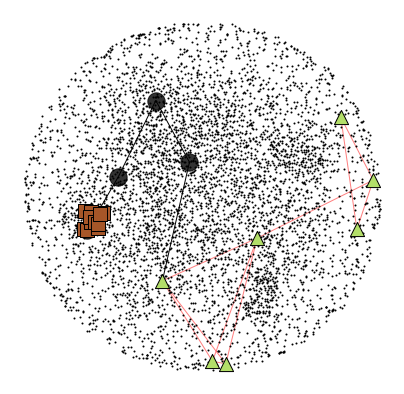

In [66]:
#define source and target effector/sensor clusters

eff_group = 'Chromosome segregation'
sens_group = "SC6\nMitochondria nucleus\nsignaling pathway"
sub_list = []
#select source and target gene from respective clusters
source = 'ctf4'
target = 'rtg1'
#calculate source and tartget
l1 = e_pcc.get_prs_weighted_path(source,target)[1]
sub_list.extend(l1)
sub = nx.induced_subgraph(e_pcc.graph_gc, l1)
node_sub=nx.induced_subgraph(sub,[i for i in l1 if i !=target])

fig, ax = plt.subplots(figsize=(7,7))
legend_elements = [    ]
nx.draw_networkx_nodes(e_pcc.graph_gc, pos=pos, node_size=1, ax=ax, node_color='black')

nx.draw_networkx_nodes(node_sub,pos=pos,alpha=0.8,
                    #  node_size = [prs_mat_df.loc[source,:].to_dict()[i]*10000 for i in sub.nodes],
    node_color = 'black')

nx.draw_networkx_edges(sub,pos=pos)
for itr, i in enumerate(sensor_order):
    if i == sens_group:
        orf_names_to_plot = sensors_pcc.loc[sensors_pcc.label==i, 'orf_name'].tolist()
        print(orf_names_to_plot)
        sub_list.extend(orf_names_to_plot)

        nx.draw_networkx_nodes(e_pcc.graph_gc, nodelist=orf_names_to_plot, node_size=200, pos=pos,
                            node_color=sensor_colors[itr],
                            node_shape='^',edgecolors='black',
                            linewidths=1)
        nx.draw_networkx_edges(nx.induced_subgraph(e_pcc.graph_gc, orf_names_to_plot), ax=ax , pos=pos, edge_color='red',alpha=0.5)

        legend_elements.append(
            Line2D([0], [0], marker='^', color='black', label=f'Sensors ({i})',
                                markerfacecolor=sensor_colors[itr], markersize=12, linestyle="None")
        )


orf_names_to_plot = effector_pcc.loc[effector_pcc.effector_cluster==0,'orf_name'].tolist()
sub_list.extend(orf_names_to_plot)

nx.draw_networkx_nodes(e_pcc.graph_gc, nodelist=orf_names_to_plot, node_size=200, pos=pos,
                    node_color=effector_colors[0],
                    node_shape='s',edgecolors='black',
                    linewidths=1)
nx.draw_networkx_edges(nx.induced_subgraph(e_pcc.graph_gc, orf_names_to_plot), ax=ax , pos=pos, edge_color='blue',alpha=0.5)
ax.set_facecolor('white')
ax.axis('off')
if snakemake.params['save']:
    plt.savefig(f'{figure_folder}/fig5d.png',bbox_inches='tight',dpi=150)

nx.write_edgelist(nx.induced_subgraph(e_pcc.graph_gc,sub_list),f'{figure_folder}/path1.csv', delimiter=',',data=False)